In [2]:
import gzip
import json
import pickle
import scipy.sparse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from scipy import spatial
from tqdm.auto import tqdm
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jly43z1i because the default path (/home/i313924/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
THREADS = 8

In [4]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/warp_model_300_epochs.pkl')

In [5]:
dataset = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/dataset.pkl')

## Precision

In [4]:
interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/lightfm_data/interactions.npz')

In [5]:
interactions_sample = scipy.sparse.load_npz('/pio/scratch/1/i313924/lightfm_data/interactions_sample.npz')

In [ ]:
# Super time-consuming: https://github.com/lyst/lightfm/issues/510
precision_at_k(model, interactions_sample, k=5, num_threads=THREADS)

## ABX

In [5]:
dataset = pd.read_pickle('/pio/scratch/1/i313924/lightfm_data/dataset.pkl')
abx_tests = pd.read_json('/pio/scratch/1/i313924/test_data/test_ABX_weighted.json', lines=True)

In [6]:
abx_tests

,A,B,X,category_AX,category_B
0,B00Z730M1M,B00HZOJFWI,B00BXA6ZJQ,Women,Novelty & More
1,B00E3V35YK,B004LOFDB2,B00GXKDM1A,Women,Novelty & More
2,B01E5A13LA,B003XDTBS8,B01ERHV7R6,Women,Men
3,B004VQ19AY,B00JFAMADQ,B01D9O8Z3M,Women,Luggage & Travel Gear
4,B016Y82UPO,B005GTQQCQ,B016S2Z5HG,Men,Women
...,...,...,...,...,...
9995,B016ZNTZDS,B00AYCKUMW,B001KYU04G,Luggage & Travel Gear,Women
9996,B01CRKBVA8,B008FXIP8S,B00D8BR36M,Women,Men
9997,B014ERCUSE,B0016HSH6K,B0060QUJPY,Girls,Men
9998,B001T6IK42,B006NLKZD2,B007I7KE9A,Men,Novelty & More


In [11]:
def get_item_embedding(model, dataset, asin):
    item_id = dataset.mapping()[2][asin]
    return model.item_embeddings[item_id]

In [8]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [9]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, dataset, test["A"])
    B[i, :] = get_item_embedding(model, dataset, test["B"])
    X[i, :] = get_item_embedding(model, dataset, test["X"])

0it [00:00, ?it/s]

In [10]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [11]:
(dist_A < dist_B).mean()

0.5019

In [12]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [13]:
(cos_dist_A < cos_dist_B).mean()

0.5115

## ABX (only popular)

In [7]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/test_ABX_weighted_slim.json', lines=True)

In [8]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [12]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, dataset, test["A"])
    B[i, :] = get_item_embedding(model, dataset, test["B"])
    X[i, :] = get_item_embedding(model, dataset, test["X"])

0it [00:00, ?it/s]

In [13]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [14]:
(dist_A < dist_B).mean()

0.5311

In [15]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [16]:
(cos_dist_A < cos_dist_B).mean()

0.5478

## Suits & dresses ABX

In [8]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/Suits_Dresses_ABX.json', lines=True)

In [9]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [12]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, dataset, test["A"])
    B[i, :] = get_item_embedding(model, dataset, test["B"])
    X[i, :] = get_item_embedding(model, dataset, test["X"])

0it [00:00, ?it/s]

In [13]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [14]:
(dist_A < dist_B).mean()

0.5113

In [15]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [16]:
(cos_dist_A < cos_dist_B).mean()

0.5256

## Embeddings PCA

In [14]:
item_embeddings = pd.DataFrame(model.item_embeddings)
user_embeddings = pd.DataFrame(model.user_embeddings)

In [15]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [16]:
embeddings.loc["items"]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.480275,-0.316181,0.249485,-0.293863,-0.186259,0.649530,-0.144081,-0.481582,-0.096520,-0.849446,...,0.159544,-0.243852,0.364890,-0.016956,0.210840,0.589933,0.572933,0.201703,-0.115667,-0.334087
1,-0.113002,0.517814,0.755034,-0.600910,0.692248,-0.591853,-0.617421,0.300097,-0.541244,0.286472,...,-0.986756,-0.128112,-0.952850,0.139592,1.073762,0.662579,0.604655,0.489400,0.480030,-0.517189
2,-0.670196,0.935503,-0.141803,-0.135351,-0.469781,-0.487098,0.146315,0.513615,0.156527,-0.126716,...,-0.054448,-0.575461,0.684656,-0.478856,0.550097,0.277534,-0.679609,0.355898,-0.196737,0.735935
3,-0.483446,-0.305067,-0.099307,-0.086869,-0.288387,0.512842,1.015293,0.472627,0.918403,0.340161,...,-0.420969,-0.327351,-0.247550,-0.277748,-0.347813,0.029079,0.467138,-0.437530,0.696305,-0.847505
4,0.421748,0.549536,-0.777768,0.205587,0.712458,-0.320330,0.428322,0.626274,0.736123,0.655380,...,-0.332244,-0.979418,0.851639,1.010061,0.828310,-0.378766,0.613579,0.550436,0.721180,0.323465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681292,0.264160,-0.165712,0.217724,-0.005788,-0.230719,0.291520,0.215981,-0.194843,-0.262216,-0.248952,...,0.085665,0.000323,0.207031,-0.229035,-0.197853,0.272501,0.141772,-0.227104,-0.154183,-0.015418
2681293,-0.115018,0.233551,0.328489,-0.017020,0.170687,0.056566,-0.014423,-0.018285,0.036852,-0.019816,...,0.440435,0.339884,0.174108,-0.198187,0.236685,0.482956,-0.292394,0.072837,0.148154,-0.949685
2681294,0.000126,-0.360959,-0.206132,0.079894,0.292920,-0.188293,-0.023106,0.153138,-0.069013,0.174079,...,-0.163644,0.222795,0.778438,0.347944,0.480993,-0.098193,0.105834,-0.026037,0.497325,0.237812
2681295,0.048020,0.009996,-0.080649,-0.052541,0.006028,-0.085454,0.061429,-0.004031,-0.057772,0.060208,...,-0.019091,-0.010464,0.016738,0.068563,0.089922,0.105839,-0.026250,0.005321,0.057659,0.017896


In [17]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [18]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

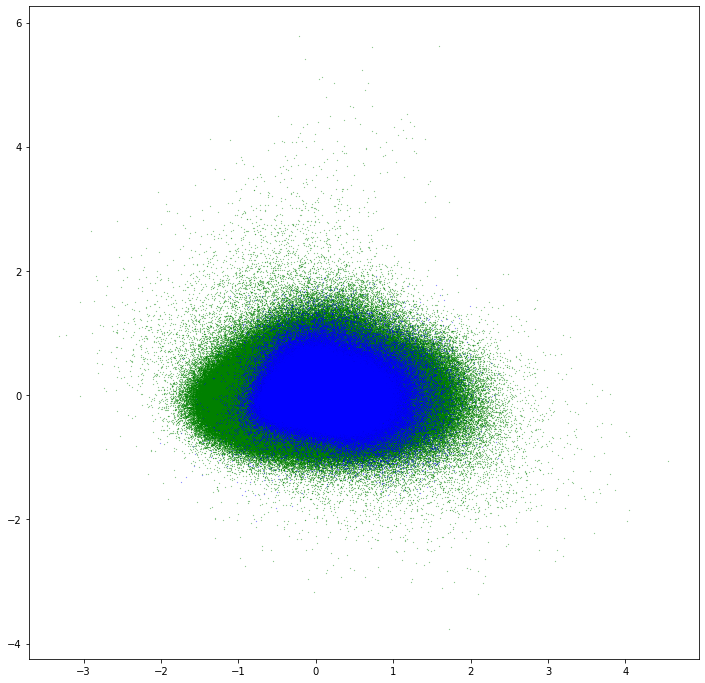

In [19]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)

In [20]:
reduced_item_embeddings

,0,1
0,0.251918,0.445245
1,-0.602435,0.561843
2,-1.311045,-0.912403
3,0.373074,-0.384691
4,0.136711,0.748727
...,...,...
2681292,-0.086416,0.121882
2681293,-0.075405,0.368150
2681294,-0.698269,-0.797421
2681295,-0.193850,-0.053396


In [21]:
item_mapping = {v: k for k, v in dataset.mapping()[2].items()}
user_mapping = {v: k for k, v in dataset.mapping()[0].items()}

In [22]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [23]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [24]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [25]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

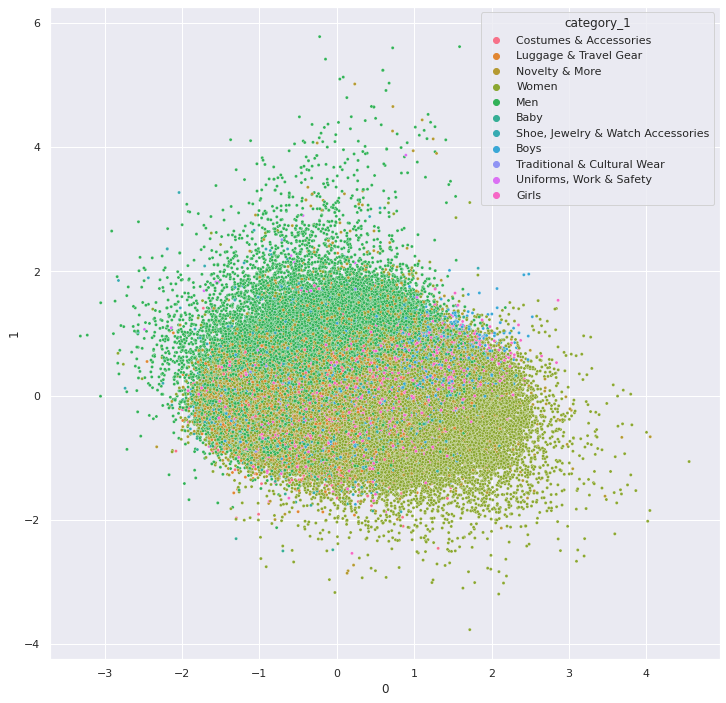

In [26]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

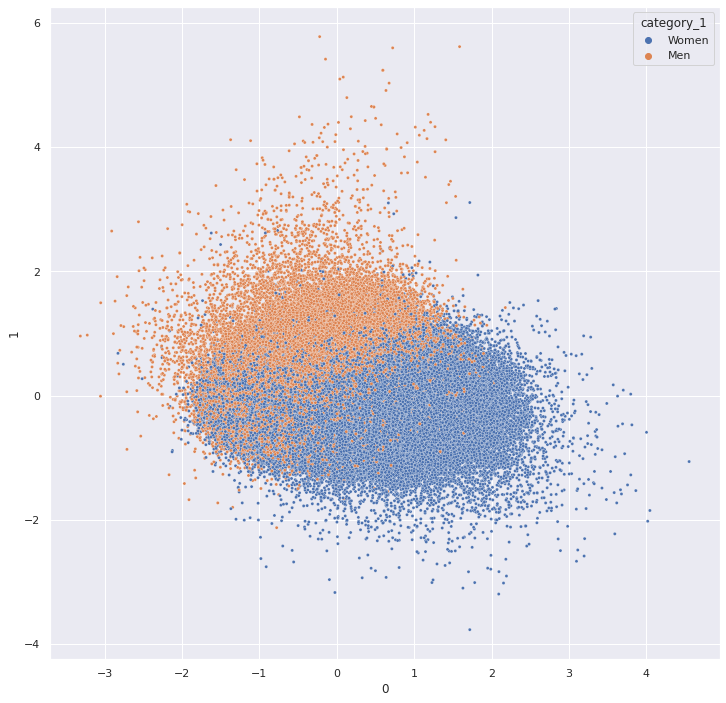

In [27]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)